# Oscar Sánchez Buendia
## Tarea de Simulación

In [112]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternativa
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [113]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Usamos la libreria de yfinance

In [114]:
import numpy as np
import pandas as pd
import yfinance as yf

### Definimos los datos que vamos a introducir

### Para esta tarea usaremos las acciones de Starbucks (SBUX)

In [115]:
empre = 'AMZN'
inicio = '2021-01-01'
fin = '2022-06-15'

#### Lo cargamos a un Data Frame

In [116]:
df = yf.download(empre, start=inicio, end=fin, adjusted=True)
print(f'Descargados {df.shape[0]} renglones de datos.')

[*********************100%***********************]  1 of 1 completed
Descargados 365 renglones de datos.


#### Calculamos los rendimientos diarios

Usamos los métodos: 

dropna(), que filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.

pct_change(), que calcula el porcentaje de cambio entre la entrada actual y la anterior

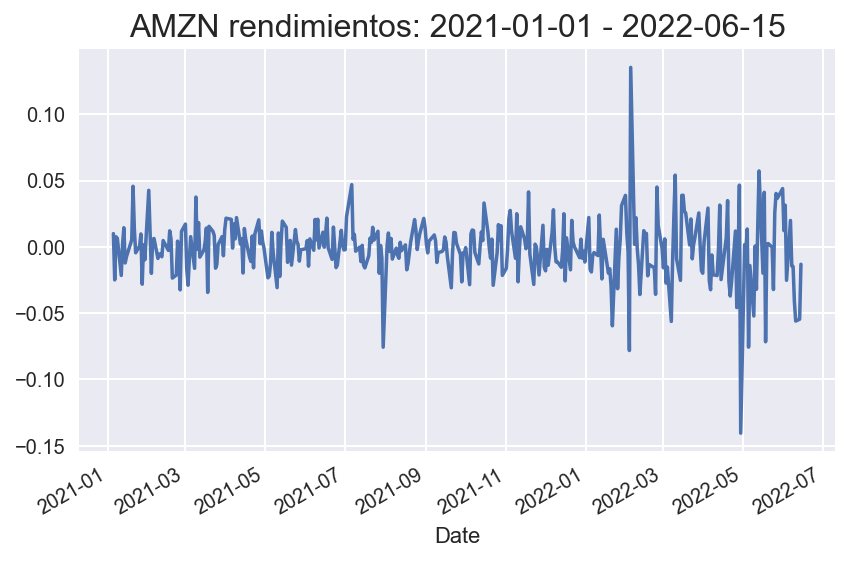

Rendimiento promedio: -0.10%


In [117]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()   

ax = returns.plot()
ax.set_title(f'{empre} rendimientos: {inicio} - {fin}', 
             fontsize=16)


plt.tight_layout()
#plt.savefig('imagen1.png')
plt.show()

print(f'Rendimiento promedio: {100 * returns.mean():.2f}%')

#### Graficamos el histograma para darnos una idea de si realmente siguen una distribución normal o no.

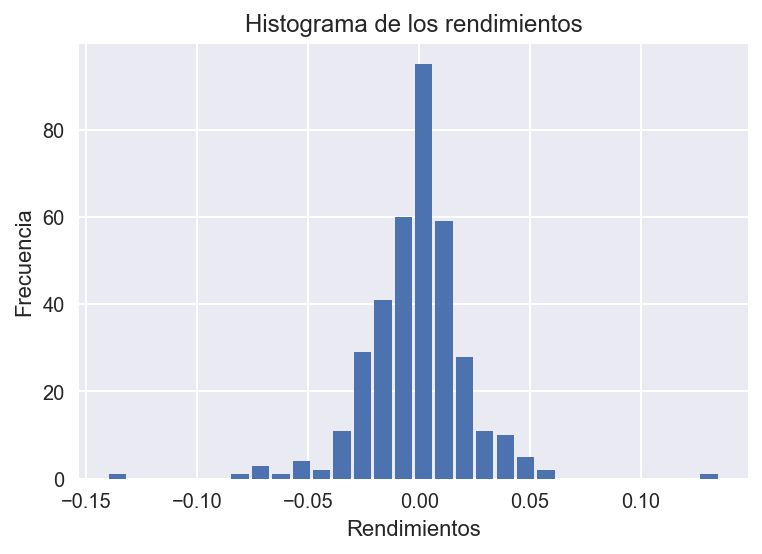

In [118]:
plt.hist(x=returns, rwidth=0.85, bins=30)
plt.title('Histograma de los rendimientos')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')

plt.show()

#### Ahora dividimos el conjunto de datos en dos: un conjunto de entrenamiento y uno de prueba, esto lo haremos tres veces.

#### -> Primero 12 meses.
#### -> Segundo 6 meses.
#### -> Tercero 14 meses.

In [119]:
train = returns['2021-01-01':'2021-12-31']
test = returns['2022-01-01':'2022-06-15']

Definimos los parámetros de la simulación

In [120]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()

#### Antes de continuar comparamos gráfica e histograma.

In [121]:
mu, sigma


from scipy import stats

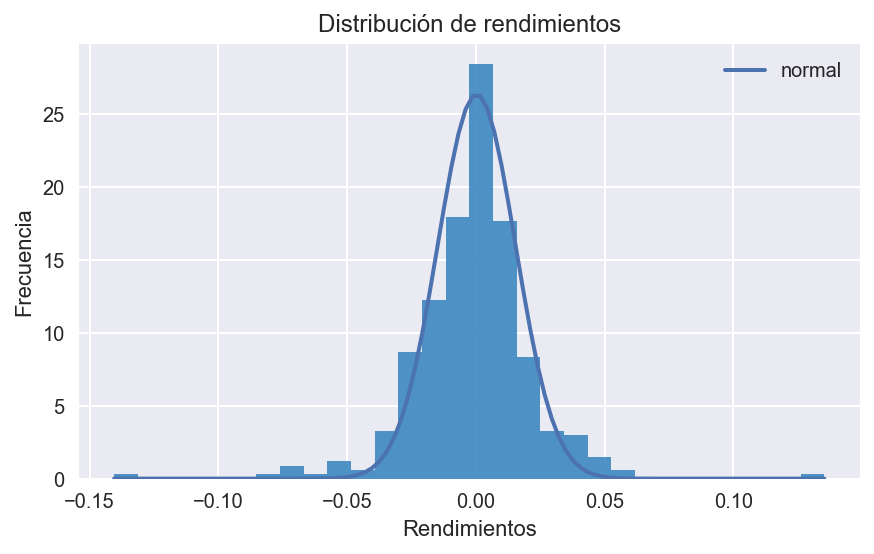

In [122]:
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

También podemos utilizar una gráfica cuantil-cuantil

In [123]:
import pylab 

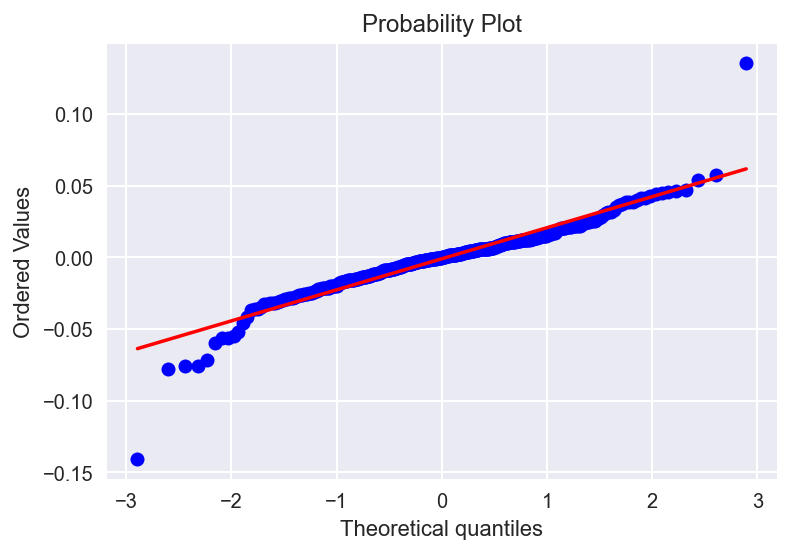

In [124]:
stats.probplot(returns, dist="norm", plot=pylab)
pylab.show()

In [125]:
from scipy.stats import kstest
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.0660356811775551, pvalue=0.07992053059211202)

#### Definimos la función para la simulación

In [126]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

#### Corremos la simulación

In [127]:
gbm_simulations = simulate_gbm(S_0, mu_1, sigma_1, N_SIM, T, N)

Gráficamos los resultados

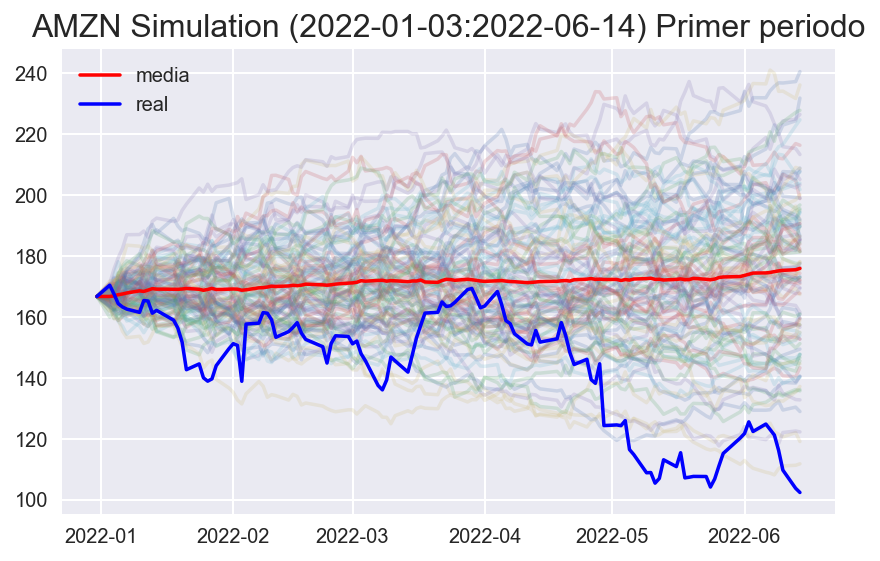

In [128]:
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{empre} Simulation 'f'({first_test_date}:{last_test_date}) Primer periodo')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

# Segundo tiempo

#### 6 meses

In [129]:
train= returns['2021-01-01':'2021-06-30']
test = returns['2022-07-01':'2022-06-15']

In [130]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train_2.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()

In [131]:
mu, sigma

(0.0007310686876200454, 0.01479530642258204)

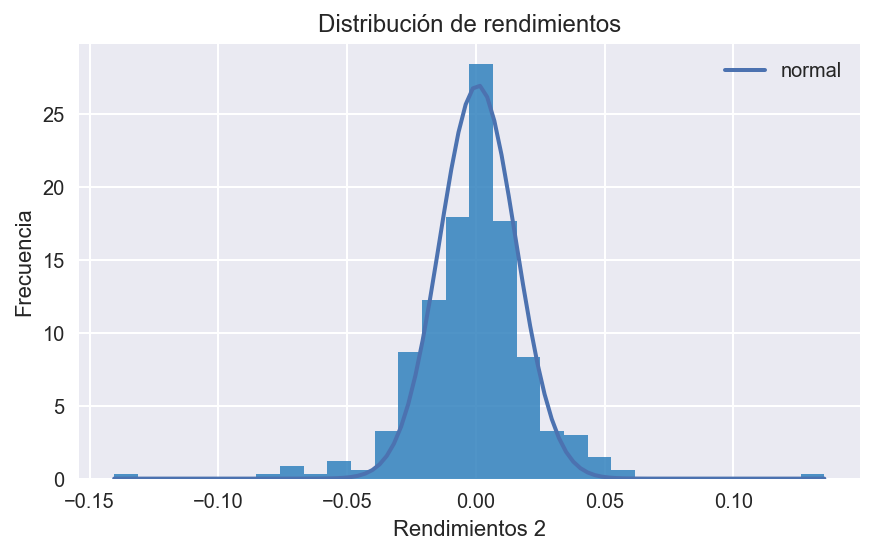

In [132]:
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos 2')
ax.set_ylabel('Frecuencia')
ax.legend();

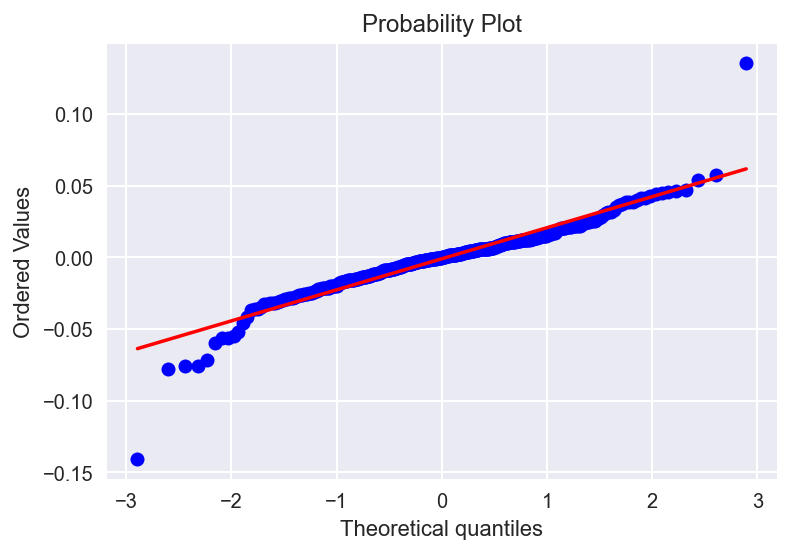

In [133]:
stats.probplot(returns, dist="norm", plot=pylab)
pylab.show()

In [134]:
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.07574968100284812, pvalue=0.029086338998221772)

In [135]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

In [136]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

ZeroDivisionError: division by zero

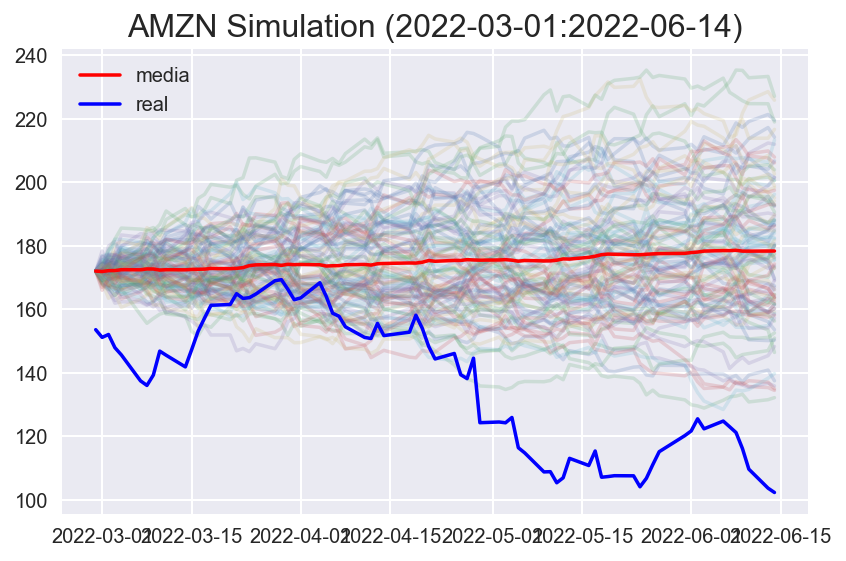

In [146]:
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{empre} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

# Tercer tiempo

#### 14 meses

In [137]:
train = returns['2021-01-01':'2022-02-28']
test = returns['2022-03-01':'2022-06-15']

In [138]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train_2.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()

In [139]:
mu, sigma

(4.370614653543098e-05, 0.018596229911456902)

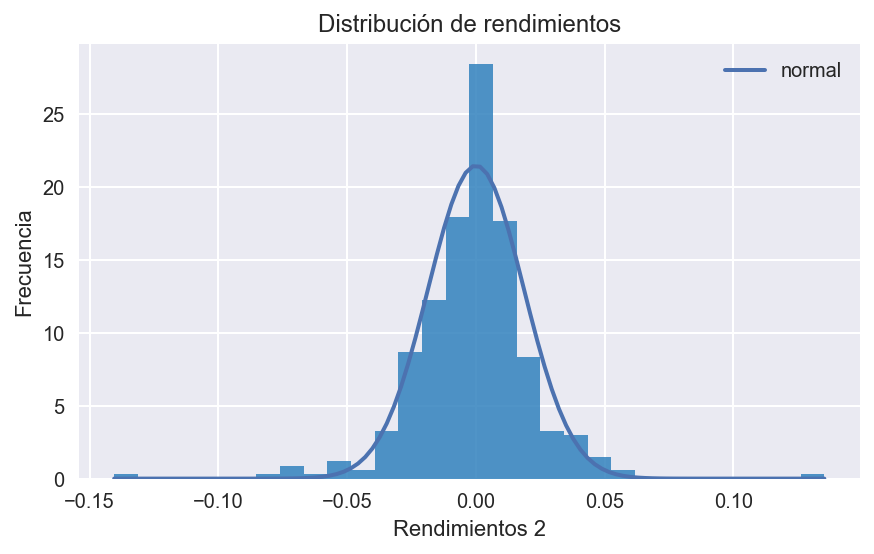

In [140]:
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos 2')
ax.set_ylabel('Frecuencia')
ax.legend();

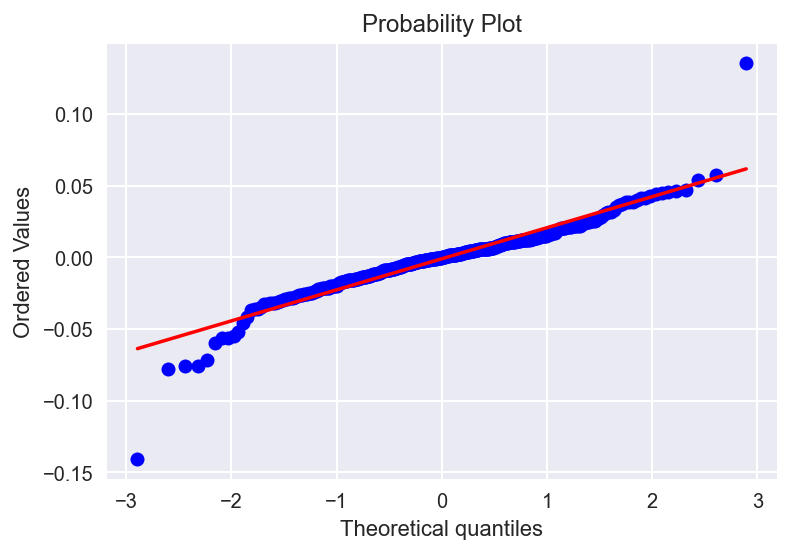

In [141]:
stats.probplot(returns, dist="norm", plot=pylab)
pylab.show()

In [142]:
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.05246794216596429, pvalue=0.25972518079509)

In [143]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

In [144]:
gbm_simulations = simulate_gbm(S_0, mu_1, sigma_1, N_SIM, T, N)

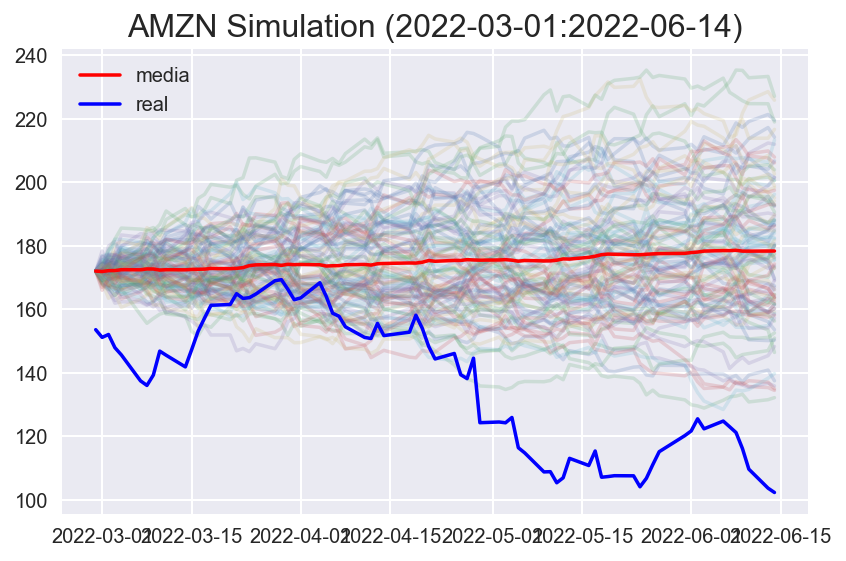

In [145]:
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{empre} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()